In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout

import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/outlul/Desktop/Πτυχιακη/Code/Datasets/LIAR_preprocessed_lemmatized_dataset.csv')
df.text = df.text.astype(str)

In [3]:
X = df['text']
y = df['Label']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [5]:
# Tokenizing text
vocab = 10000
tokenizer = Tokenizer(num_words= vocab)
tokenizer.fit_on_texts(X_train)

# Text to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding
X_train_padded = pad_sequences(X_train_sequences, maxlen=128)
X_test_padded = pad_sequences(X_test_sequences, maxlen=128)

In [6]:
# LSTM v02
model = Sequential()
model.add(Embedding(vocab, 50, input_length=128))
model.add(Bidirectional(LSTM(64, return_sequences = True)))
model.add(Bidirectional(LSTM(16)))
tf.keras.layers.Dense(64, activation='relu')
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Compile
model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 50)           500000    
                                                                 
 bidirectional (Bidirectiona  (None, 128, 128)         58880     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               18560     
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 577,473
Trainable params: 577,473
Non-trai

In [7]:
# Train the model
history = model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=8, batch_size=30)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train_padded, y_train)
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)

print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/8
213/213 [==============================] - 36s 129ms/step - loss: 0.6587 - accuracy: 0.6099 - val_loss: 0.6223 - val_accuracy: 0.6512
Epoch 2/8
213/213 [==============================] - 28s 131ms/step - loss: 0.5228 - accuracy: 0.7551 - val_loss: 0.6530 - val_accuracy: 0.6524
Epoch 3/8
213/213 [==============================] - 25s 118ms/step - loss: 0.3704 - accuracy: 0.8554 - val_loss: 0.7918 - val_accuracy: 0.6386
Epoch 4/8
213/213 [==============================] - 25s 118ms/step - loss: 0.2405 - accuracy: 0.9161 - val_loss: 0.9232 - val_accuracy: 0.6299
Epoch 5/8
213/213 [==============================] - 29s 135ms/step - loss: 0.1626 - accuracy: 0.9500 - val_loss: 1.1656 - val_accuracy: 0.6230
Epoch 6/8
213/213 [==============================] - 26s 120ms/step - loss: 0.1068 - accuracy: 0.9677 - val_loss: 1.3677 - val_accuracy: 0.6104
Epoch 7/8
213/213 [==============================] - 25s 118ms/step - loss: 0.0826 - accuracy: 0.9774 - val_loss: 1.4709 - val_accuracy:

[0.6587323546409607, 0.5227637887001038, 0.3704093098640442, 0.2404770404100418, 0.16258709132671356, 0.10677477717399597, 0.08260331302881241, 0.05785539746284485]
[0.6223345994949341, 0.6529567837715149, 0.7917706966400146, 0.923176109790802, 1.1656074523925781, 1.3677277565002441, 1.4709306955337524, 1.6857155561447144]
[0.6098823547363281, 0.7551372647285461, 0.8553725481033325, 0.9160784482955933, 0.9499607682228088, 0.9676862955093384, 0.9774117469787598, 0.9843137264251709]
[0.6511919498443604, 0.6524466872215271, 0.6386449337005615, 0.6298620104789734, 0.6229611039161682, 0.6104140281677246, 0.616060197353363, 0.6047678589820862]


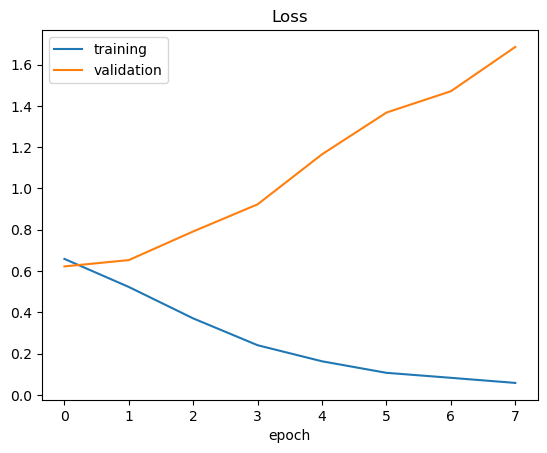

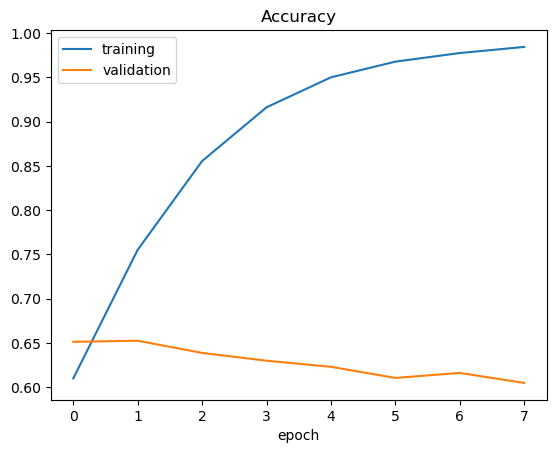

In [8]:
print(history.history['loss'])
print(history.history['val_loss'])
print(history.history['accuracy'])
print(history.history['val_accuracy'])

plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')


plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

plt.show()

In [9]:
prd_df = pd.read_csv('C:/Users/outlul/Desktop/Πτυχιακη/Code/Datasets/HugeDatasetPredictSample.csv')

In [10]:
val_text = prd_df['text']
val_label = prd_df['label']

In [11]:
val_text_sequences = tokenizer.texts_to_sequences(val_text)

val_text_padded = pad_sequences(val_text_sequences, maxlen=128)

In [12]:
test2_loss, test2_accuracy = model.evaluate(val_text_padded, val_label)

313/313 [==============================] - 10s 31ms/step - loss: 2.2350 - accuracy: 0.5816


In [13]:
pred = model.predict(val_text_padded)

313/313 [==============================] - 11s 30ms/step


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

In [15]:
binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

Accuracy on testing set: 0.5816
Precision on testing set: 0.3259968102073365
Recall on testing set: 0.33042353701907534


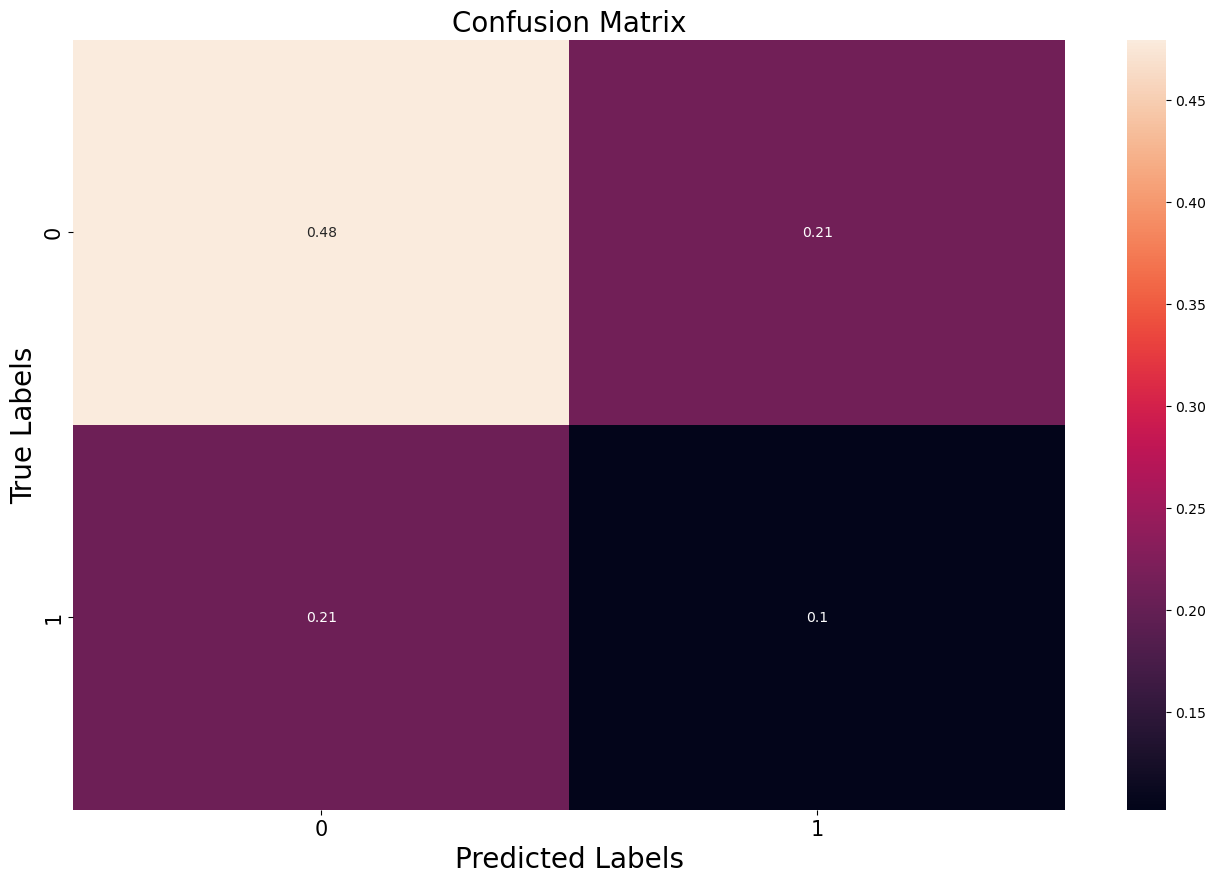

In [16]:
matrix = confusion_matrix(binary_predictions, val_label, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

print('Accuracy on testing set:', accuracy_score(binary_predictions, val_label))
print('Precision on testing set:', precision_score(binary_predictions, val_label))
print('Recall on testing set:', recall_score(binary_predictions, val_label))

In [17]:
print("Classification Report on First Test set\n")
print(classification_report(binary_predictions, val_label))

Classification Report on First Test set

              precision    recall  f1-score   support

           0       0.70      0.69      0.70      6907
           1       0.33      0.33      0.33      3093

    accuracy                           0.58     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.58      0.58      0.58     10000



50/50 [==============================] - 1s 25ms/step
Accuracy on testing set: 0.6047678795483061
Precision on testing set: 0.5873015873015873
Recall on testing set: 0.5419440745672437
Classification Report on Training set

              precision    recall  f1-score   support

           0       0.62      0.66      0.64       843
           1       0.59      0.54      0.56       751

    accuracy                           0.60      1594
   macro avg       0.60      0.60      0.60      1594
weighted avg       0.60      0.60      0.60      1594



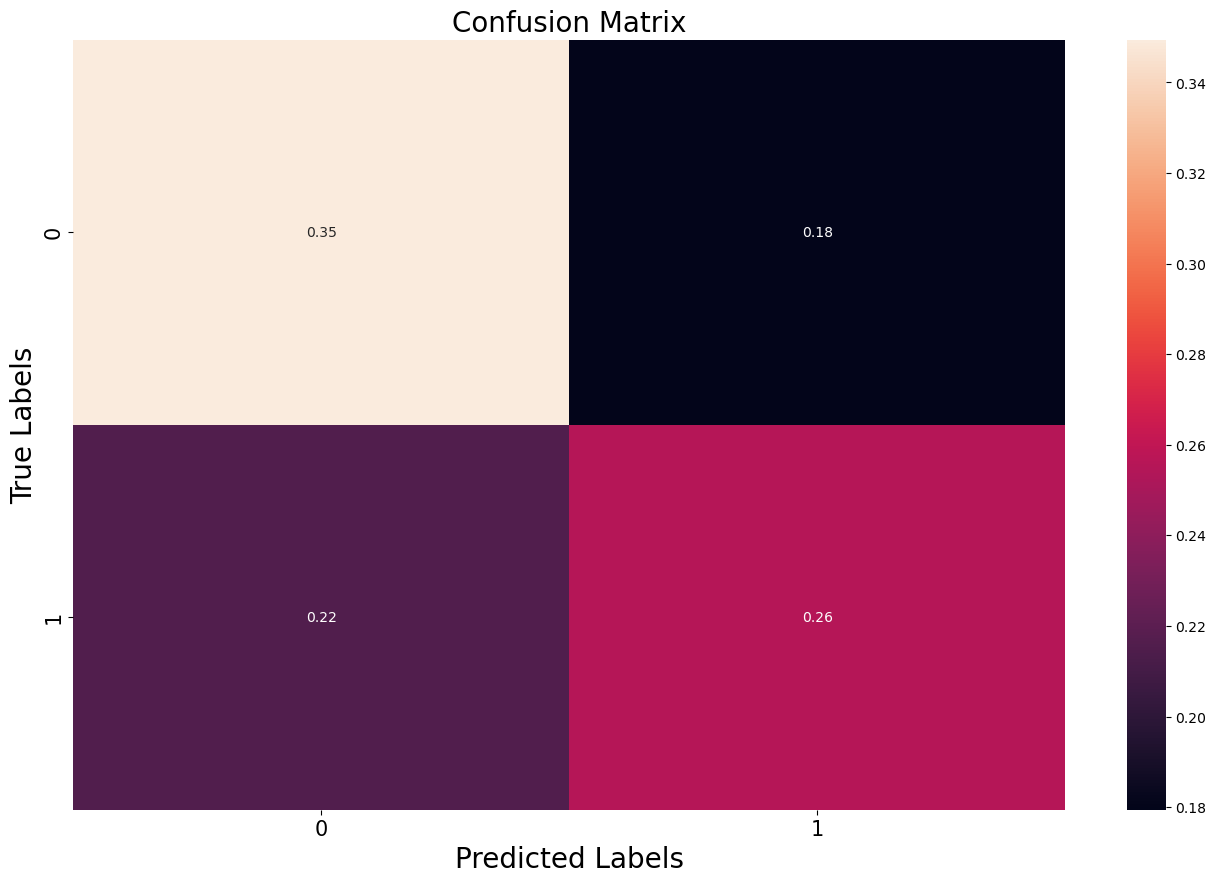

In [18]:
pred = model.predict(X_test_padded)

binary_predictions_Train = []

for i in pred:
    if i >= 0.5:
        binary_predictions_Train.append(1)
    else:
        binary_predictions_Train.append(0) 
        
matrix = confusion_matrix(binary_predictions_Train, y_test, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

print('Accuracy on testing set:', accuracy_score(binary_predictions_Train, y_test))
print('Precision on testing set:', precision_score(binary_predictions_Train, y_test))
print('Recall on testing set:', recall_score(binary_predictions_Train, y_test))

print("Classification Report on Training set\n")
print(classification_report(binary_predictions_Train, y_test))

In [ ]:
val2_df = pd.read_csv('C:/Users/outlul/Desktop/Πτυχιακη/Code/Datasets/WELFake_Dataset.csv')
val2_df.text = val2_df.text.astype(str)

val2_text = val2_df['text']
val2_label = val2_df['label']

val2_text_sequences = tokenizer.texts_to_sequences(val2_text)

val2_text_padded = pad_sequences(val2_text_sequences, maxlen=128)

pred_val2 = model.predict(val2_text_padded)

binary_predictions_val2 = []

for i in pred_val2:
    if i >= 0.5:
        binary_predictions_val2.append(1)
    else:
        binary_predictions_val2.append(0) 
        
matrix = confusion_matrix(binary_predictions_val2, val2_label, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

print('Accuracy on testing set:', accuracy_score(binary_predictions_val2, val2_label))
print('Precision on testing set:', precision_score(binary_predictions_val2, val2_label))
print('Recall on testing set:', recall_score(binary_predictions_val2, val2_label))

print("Classification Report on Second Test set\n")
print(classification_report(binary_predictions_val2, val2_label))

1030/2255 [============>.................] - ETA: 34s

In [ ]:
#import joblib

#filename = "LIAR_NoLemma_model_01.joblib"
#joblib.dump(model, filename)